In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Dataset

In [26]:
# Importing the dataset
dataset = pd.read_csv('diamonds.csv')

In [27]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


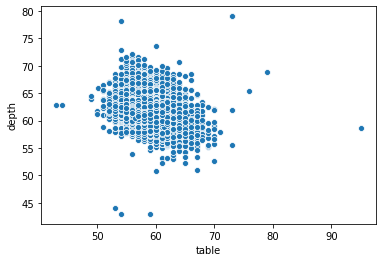

In [28]:
sns.scatterplot(x="table",y="depth",data=dataset);

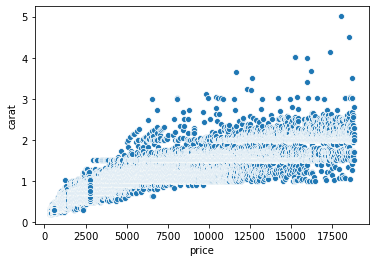

In [29]:
sns.scatterplot(x="price",y="carat", data=dataset);

In [32]:
df  =dataset.copy()
le = LabelEncoder()
df = df.apply(le.fit_transform)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,30,0,20,26,24
1,1,3,1,2,66,90,0,14,12,12
2,3,1,1,4,37,115,1,30,35,12
3,9,3,5,5,92,60,2,45,51,44
4,11,1,6,3,101,60,3,59,63,56
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,76,50,2300,200,204,131
53936,52,1,0,2,99,30,2300,194,203,142
53937,50,4,0,2,96,80,2300,191,196,137
53938,66,3,4,3,78,60,2300,240,240,155


### Independent and dependent variables

In [34]:
X=df.drop('price',axis=1)
y=df['price']

### Train test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Find K value

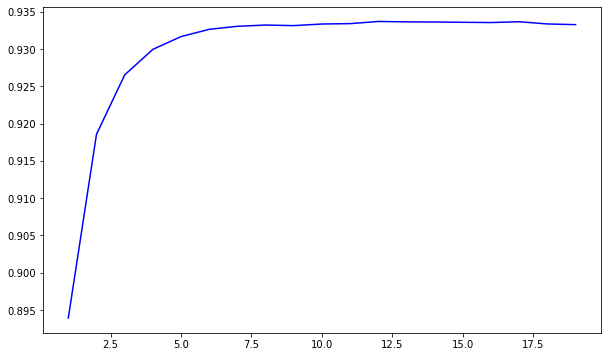

In [39]:
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))  

plt.figure(figsize=(10,6))
plt.plot(range(1,20),score,color='blue')

In [40]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 12, Max Accuracy = 93.37004349656478


### Fit the model

In [41]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   


0.9337004349656477


### Making predictions

In [42]:
y_pred = clf.predict(X_test)

In [44]:
y_pred = clf.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.round(2)})
df

,Real Values,Predicted Values
1388,214,207.60
50052,1757,1405.43
41645,893,857.12
42377,956,797.88
17244,6039,8280.00
...,...,...
36825,612,1233.48
24803,9666,9828.54
20999,7654,7110.08
8471,3861,4864.12


In [45]:
from sklearn.metrics import r2_score
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_test - y_pred)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_test - y_pred) **2 ))
print('R2-score: %.2f' % r2_score(y_test, y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) **2))
print("RMSE value: {:.2f}".format(rmse))

Mean absolute error: 470.12
Residual sum of squares (MSE): 592708.01
R2-score: 0.93
RMSE value: 769.88
